# Gradient Boosting

In [117]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import push_results as pr
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import confusion_matrix

In [118]:
filepath = '../data/train_test_split/scherzer/2019_two_classes/'

infile = open(filepath + 'X_train_2c.pickle','rb')
X_train = pickle.load(infile)
infile.close()

infile = open(filepath + 'X_test_2c.pickle','rb')
X_test = pickle.load(infile)
infile.close()

infile = open(filepath + 'y_train_2c.pickle','rb')
y_train = pickle.load(infile)
infile.close()

infile = open(filepath + 'y_test_2c.pickle','rb')
y_test = pickle.load(infile)
infile.close()

In [119]:
y_train = np.array(y_train).reshape(-1, ).astype('int')
y_test = np.array(y_test).reshape(-1, ).astype('int')
# y_train_2c = np.array(y_train_2c).reshape(-1, )
# y_train_3c = np.array(y_train_3c).reshape(-1, )

## GBC for all types of pitches

In [120]:
gbc = GradientBoostingClassifier(random_state=31)

In [121]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=31, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [122]:
gbc.score(X_train, y_train), gbc.score(X_test, y_test)

(0.7132542547705003, 0.5054151624548736)

In [123]:
y_pred = gbc.predict(X_train)

/Users/algrhythm/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


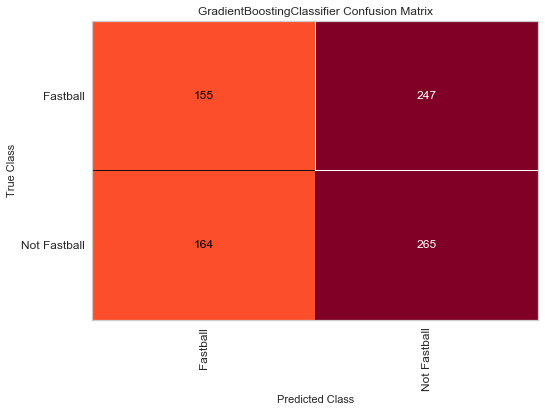

In [124]:
iris_cm = ConfusionMatrix(gbc, classes=['Fastball', 'Not Fastball'])

iris_cm.fit(X_train, y_train)
iris_cm.score(X_test, y_test)

iris_cm.show();

In [125]:
# pr.push_results('gbc_def_v2', 'GradientBoostingClassifier', 'Default', gbc.score(X_train, y_train))

# # results_dict.update({'Gradient Boosting': gbc.score(X_train, y_train)})

## Cross validation

In [126]:
scores = cross_val_score(gbc, X_train, y_train, cv=5, scoring= 'accuracy')

In [127]:
np.average(scores)

0.5435866698633423

In [128]:
# pr.push_results('gbc_cv_v2', 'GradientBoostingClassifier', 'Cross Validation', gbc.score(X_train, y_train))


# # results_dict.update({'GradientBoosting CV5': np.average(scores)})

## Randomized Search

In [129]:
## Tested ranges

# params = {'min_samples_split': [2, range(5, 1000, 5)]}

gbc2 = GradientBoostingClassifier(random_state=31)

params = {'min_samples_split': range(500, 1000, 25),
          'min_samples_leaf': [5, range(25, 100, 25)], 
          'max_depth': range(5, 50, 5), 
          'max_leaf_nodes': range(25, 500, 25), 
          'max_features': [2, range(5, 50, 5)]}

rs = RandomizedSearchCV(gbc2, params, n_jobs=-1, random_state=31, cv=5, verbose = 1, refit=True)

rs.fit(X_train, y_train);

rs.best_params_, rs.score(X_train, y_train), rs.score(X_test, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.4s finished


({'min_samples_split': 950,
  'min_samples_leaf': 5,
  'max_leaf_nodes': 175,
  'max_features': 2,
  'max_depth': 20},
 0.6482723053120165,
 0.5102286401925391)

/Users/algrhythm/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


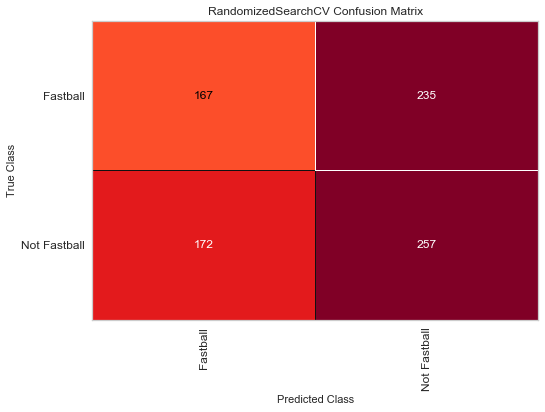

In [130]:
iris_cm = ConfusionMatrix(rs, classes=['Fastball', 'Not Fastball'])

iris_cm.fit(X_train, y_train)
iris_cm.score(X_test, y_test)

iris_cm.show();

In [131]:
gbcb = GradientBoostingClassifier(subsample=0.008, 
                                  n_estimators=10, 
                                  min_samples_split= 5,
                                  max_features='sqrt', 
                                  max_depth=5, 
                                  learning_rate = 0.001,
                                  criterion ='friedman_mse', 
                                  random_state=31)

In [132]:
gbcb.fit(X_train, y_train);

In [133]:
gbcb.score(X_train, y_train)

0.5157297576070139

In [134]:
gbcb.score(X_test, y_test)

0.516245487364621

/Users/algrhythm/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


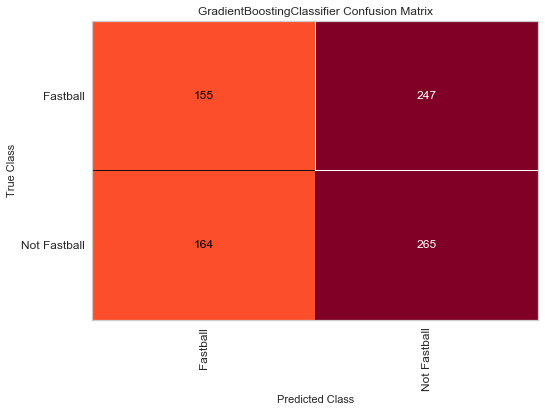

In [135]:
iris_cm = ConfusionMatrix(gbc, classes=['Fastball', 'Not Fastball'])

iris_cm.fit(X_train, y_train)
iris_cm.score(X_test, y_test)

iris_cm.show();

## Model validation
Code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

In [136]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [137]:
# Binarize the output
y_train = label_binarize(y_train, classes=[0, 1])
y_test = label_binarize(y_test, classes=[0, 1])
n_classes = y_train.shape[1]

In [138]:
# Learn to predict each class against the other
classifier = OneVsRestClassifier(gbcb)

y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [139]:
# # Learn to predict each class against the other
# classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
#                                  random_state=31))

# y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [140]:
classifier.score(X_train, y_train)

0.5157297576070139

In [141]:
classifier.score(X_test, y_test)

0.516245487364621

In [142]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

IndexError: too many indices for array

In [143]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [146]:
plt.figure()
plt.figure(figsize=(15,11))
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

KeyError: 2

<Figure size 576x396 with 0 Axes>

<Figure size 1080x792 with 0 Axes>

## Multiclass ROC

In [147]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.figure(figsize=(15,11))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'blue', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")

plt.show()

KeyError: 0

In [45]:
from sklearn.neural_network import MLPClassifier

In [ ]:
clf = MLPClassifier(random_state=31, max_iter=300, hidden_layer_sizes=(500,))
clf.fit(X_train, y_train)
clf.score(X_train, y_train), clf.score(X_test, y_test)
# clf.predict_proba(X_test[:1])

# clf.predict(X_test[:5, :])



In [ ]:
params = {'hidden_layer_sizes': [(100,), (200,), (300,), (500,), (1000,)],
          'activation': ['identity', 'logistic', 'tanh', 'relu'],
          'solver': ['lbfgs', 'sgd', 'adam'],
          'alpha': [0.0001, .001, .01, 1],
          'learning_rate': ['constant', 'invscaling', 'adaptive'],
          'learning_rate_init': [0.001, 0.01, .1, 1]}

In [ ]:
rsmlp = RandomizedSearchCV(estimator = clf, param_distributions= params, n_iter = 5, n_jobs = -1, cv = 5, verbose = 1)

In [ ]:
rsmlp.fit(X_train, y_train);

In [ ]:
rsmlp.score(X_train, y_train)

In [ ]:
rsmlp.best_params_

In [ ]:
rsmlp.score(X_test, y_test)

In [ ]:
rsmlp.classes_

In [ ]:
rsmlp.error_score

In [ ]:
rsmlp.predict_proba(X_test)

In [ ]:
y_test